In [24]:
import chromedriver_autoinstaller
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import pickle
from selenium import webdriver
import time
import os
import argparse
import requests
from bs4 import BeautifulSoup
from collections import Counter
from konlpy.tag import Okt
import matplotlib.pyplot as plt

In [3]:
kor_url1 = 'https://www.google.com/search?q=e%EC%8A%A4%ED%8F%AC%EC%B8%A0&biw=1920&bih=880&sxsrf=APq-WBviL9dhPb9BCbI2hgq05klnCGQ02A%3A1650442974935&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F1%2F2020%2Ccd_max%3A1%2F1%2F2022&tbm=nws'
kor_url2 = 'https://www.google.com/search?q=e%EC%8A%A4%ED%8F%AC%EC%B8%A0&biw=1920&bih=880&sxsrf=APq-WBvlGomCBg-eGjLTkFMpu78ac7nZHw%3A1650442865774&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F1%2F2012%2Ccd_max%3A1%2F1%2F2014&tbm=nws'
kor_url3 = 'https://www.google.com/search?q=e%EC%8A%A4%ED%8F%AC%EC%B8%A0&biw=1920&bih=880&sxsrf=APq-WBuzX1Dumc-0pGQ92_jgCgnlnlB9Ew%3A1650442902089&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F1%2F2014%2Ccd_max%3A1%2F1%2F2016&tbm=nws'
kor_url4 = 'https://www.google.com/search?q=e%EC%8A%A4%ED%8F%AC%EC%B8%A0&biw=1920&bih=880&sxsrf=APq-WBtM3kLDxpiqLoEQ89xFpd0IiSV0PA%3A1650442919400&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F1%2F2016%2Ccd_max%3A1%2F1%2F2018&tbm=nws'
kor_url5 = 'https://www.google.com/search?q=e%EC%8A%A4%ED%8F%AC%EC%B8%A0&biw=1920&bih=880&sxsrf=APq-WBum2uully7qEqQ4G_AgIZH9Ej_XZQ%3A1650442941253&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F1%2F2018%2Ccd_max%3A1%2F1%2F2020&tbm=nws'
url_list = [kor_url1, kor_url2, kor_url3, kor_url4, kor_url5]

In [5]:
def noun_extractor(url_list):
    text_list = []

    for url in url_list:
        driver = webdriver.Chrome('./chromedriver.exe')
        driver.implicitly_wait(1)

        driver.get(url)
        for j in range(200):
            articles = driver.find_elements_by_class_name('WlydOe')
            for i in range(len(articles)):
                text_list.append(articles[i].find_elements_by_css_selector('div')[0].text)
            
            try :
                time.sleep(3)
                driver.find_element_by_id('pnnext').click()

            except :
                print('url finished')
                break

            if j == 199 :
                print('url finished')

        driver.close()
        time.sleep(2)

    okt = Okt()
    all_nouns = []
    for i in range(len(text_list)):
        temp = okt.nouns(text_list[i])
        all_nouns += temp
        if i%100 == 0:
            print('{}/{}'.format(i+1, len(text_list)))
    

    return(all_nouns)


In [6]:
url_list = ['https://www.google.com/search?q=e%EC%8A%A4%ED%8F%AC%EC%B8%A0&tbs=cdr:1,cd_min:4/20/2022,cd_max:4/20/2017&tbm=nws&sxsrf=APq-WBuCsb9oTSum4kWu4jqRnbkxaqE4og:1650457065931&ei=6flfYqyuOIqw2roPy8aooA0&start=100&sa=N&ved=2ahUKEwjsxobZz6L3AhUKmFYBHUsjCtQQ8tMDegQIARA3&biw=1366&bih=625&dpr=1']

In [7]:
results1 = noun_extractor(url_list)

url finished
1/160
101/160


In [17]:
results = Counter(results1)
sorted(results, key = results.get, reverse=True)
print(len(results))

1487


In [20]:
filtered_list = {}
for k,v in results.items():
    if len(k) >= 2 :
        filtered_list[k] = v
tags = Counter(filtered_list).most_common(50)
font_path='C:\\Users\\jaemini_man\\Desktop\\github\\esports_news_crawling\\MaruBuriTTF\\MaruBuri-Bold.ttf'
wc = WordCloud(font_path = font_path,background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

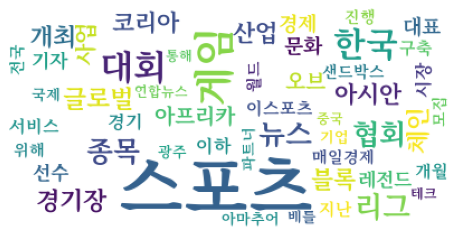

In [37]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()